In [6]:
from PyQubo_formulation import *

import matplotlib.pyplot as plt

In [147]:
x, xvars = Create_Float_Vec(4, 4, [-1,1], 'x')
x


array([((((Binary('x[0]') + (0.500000 * Binary('x[1]'))) + (0.250000 * Binary('x[2]'))) + (0.125000 * Binary('x[3]'))) + -1.000000),
       ((((Binary('x[4]') + (0.500000 * Binary('x[5]'))) + (0.250000 * Binary('x[6]'))) + (0.125000 * Binary('x[7]'))) + -1.000000),
       ((((Binary('x[8]') + (0.500000 * Binary('x[9]'))) + (0.250000 * Binary('x[10]'))) + (0.125000 * Binary('x[11]'))) + -1.000000),
       ((((Binary('x[12]') + (0.500000 * Binary('x[13]'))) + (0.250000 * Binary('x[14]'))) + (0.125000 * Binary('x[15]'))) + -1.000000)],
      dtype=object)

In [148]:
k, kvars = Create_Float_Vec(4, 4, [0,1], 'k')
k

array([(0.500000 * (((Binary('k[0]') + (0.500000 * Binary('k[1]'))) + (0.250000 * Binary('k[2]'))) + (0.125000 * Binary('k[3]')))),
       (0.500000 * (((Binary('k[4]') + (0.500000 * Binary('k[5]'))) + (0.250000 * Binary('k[6]'))) + (0.125000 * Binary('k[7]')))),
       (0.500000 * (((Binary('k[8]') + (0.500000 * Binary('k[9]'))) + (0.250000 * Binary('k[10]'))) + (0.125000 * Binary('k[11]')))),
       (0.500000 * (((Binary('k[12]') + (0.500000 * Binary('k[13]'))) + (0.250000 * Binary('k[14]'))) + (0.125000 * Binary('k[15]'))))],
      dtype=object)

In [149]:
mu, muvars = Create_Float_Vec(1, 4, [0,4], 'mu')
mu=mu[0]

In [150]:
from Radio import *


In [151]:
H = np.around(Channel_Rayleigh(2,2), decimals=0)
H

array([[1.+1.j, 2.+1.j],
       [3.+1.j, 2.+1.j]])

In [152]:
s = Create_S(2, 16)
s

array([-3.-1.j,  3.-1.j])

# EVM

<br>
<br>



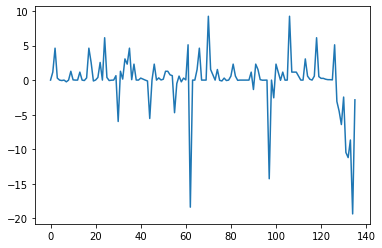

In [153]:
evm = EVM(x, s).compile()
evm_qubo = evm.to_qubo()
plt.plot(list(evm_qubo[0].values()))

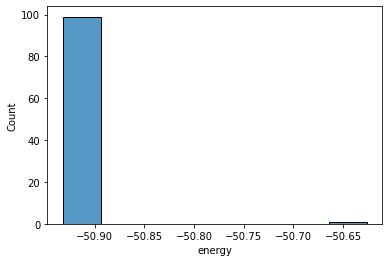

In [154]:
sampler = neal.SimulatedAnnealingSampler()

sampleset = sampler.sample_qubo(evm_qubo[0], num_reads=100)

samples = sampleset.samples()


data = sampleset.to_pandas_dataframe()

min_samples = Get_Low_E_Samples(data, 0)

sns.histplot(data['energy'])

plt.show()

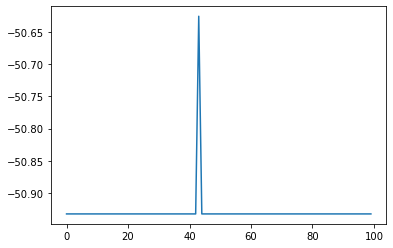

In [155]:
plt.plot(data['energy'])

In [156]:
data

,x[0],x[10],x[11],x[12],x[13],x[14],x[15],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],energy,num_occurrences
0,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
2,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
3,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
4,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
96,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
97,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
98,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1


In [157]:
evmdecoded = evm.decode_sampleset(sampleset)
for i in range(100):
    print(evmdecoded[0].sample)
# best_sample = min(evmdecoded, key=lambda samp: samp.energy)
# best_sample.energy

{'x[8]': 1, 'x[7]': 1, 'x[6]': 1, 'x[2]': 0, 'x[1]': 0, 'x[0]': 0, 'x[15]': 0, 'x[3]': 0, 'x[14]': 1, 'x[12]': 0, 'x[9]': 1, 'x[5]': 1, 'x[4]': 1, 'x[10]': 1, 'x[11]': 1, 'x[13]': 0}
{'x[8]': 1, 'x[7]': 1, 'x[6]': 1, 'x[2]': 0, 'x[1]': 0, 'x[0]': 0, 'x[15]': 0, 'x[3]': 0, 'x[14]': 1, 'x[12]': 0, 'x[9]': 1, 'x[5]': 1, 'x[4]': 1, 'x[10]': 1, 'x[11]': 1, 'x[13]': 0}
{'x[8]': 1, 'x[7]': 1, 'x[6]': 1, 'x[2]': 0, 'x[1]': 0, 'x[0]': 0, 'x[15]': 0, 'x[3]': 0, 'x[14]': 1, 'x[12]': 0, 'x[9]': 1, 'x[5]': 1, 'x[4]': 1, 'x[10]': 1, 'x[11]': 1, 'x[13]': 0}
{'x[8]': 1, 'x[7]': 1, 'x[6]': 1, 'x[2]': 0, 'x[1]': 0, 'x[0]': 0, 'x[15]': 0, 'x[3]': 0, 'x[14]': 1, 'x[12]': 0, 'x[9]': 1, 'x[5]': 1, 'x[4]': 1, 'x[10]': 1, 'x[11]': 1, 'x[13]': 0}
{'x[8]': 1, 'x[7]': 1, 'x[6]': 1, 'x[2]': 0, 'x[1]': 0, 'x[0]': 0, 'x[15]': 0, 'x[3]': 0, 'x[14]': 1, 'x[12]': 0, 'x[9]': 1, 'x[5]': 1, 'x[4]': 1, 'x[10]': 1, 'x[11]': 1, 'x[13]': 0}
{'x[8]': 1, 'x[7]': 1, 'x[6]': 1, 'x[2]': 0, 'x[1]': 0, 'x[0]': 0, 'x[15]': 0, 'x[3]'

In [158]:
min_samples[0]

array([{'x[0]': 0, 'x[10]': 1, 'x[11]': 1, 'x[12]': 0, 'x[13]': 0, 'x[14]': 1, 'x[15]': 0, 'x[1]': 0, 'x[2]': 0, 'x[3]': 0, 'x[4]': 1, 'x[5]': 1, 'x[6]': 1, 'x[7]': 1, 'x[8]': 1, 'x[9]': 1},
       {'x[0]': 0, 'x[10]': 1, 'x[11]': 1, 'x[12]': 0, 'x[13]': 0, 'x[14]': 1, 'x[15]': 0, 'x[1]': 0, 'x[2]': 0, 'x[3]': 0, 'x[4]': 1, 'x[5]': 1, 'x[6]': 1, 'x[7]': 1, 'x[8]': 1, 'x[9]': 1},
       {'x[0]': 0, 'x[10]': 1, 'x[11]': 1, 'x[12]': 0, 'x[13]': 0, 'x[14]': 1, 'x[15]': 0, 'x[1]': 0, 'x[2]': 0, 'x[3]': 0, 'x[4]': 1, 'x[5]': 1, 'x[6]': 1, 'x[7]': 1, 'x[8]': 1, 'x[9]': 1},
       {'x[0]': 0, 'x[10]': 1, 'x[11]': 1, 'x[12]': 0, 'x[13]': 0, 'x[14]': 1, 'x[15]': 0, 'x[1]': 0, 'x[2]': 0, 'x[3]': 0, 'x[4]': 1, 'x[5]': 1, 'x[6]': 1, 'x[7]': 1, 'x[8]': 1, 'x[9]': 1},
       {'x[0]': 0, 'x[10]': 1, 'x[11]': 1, 'x[12]': 0, 'x[13]': 0, 'x[14]': 1, 'x[15]': 0, 'x[1]': 0, 'x[2]': 0, 'x[3]': 0, 'x[4]': 1, 'x[5]': 1, 'x[6]': 1, 'x[7]': 1, 'x[8]': 1, 'x[9]': 1},
       {'x[0]': 0, 'x[10]': 1, 'x[11]': 1, 'x

In [159]:
nqx = 4

x_res = np.zeros((len(min_samples[0]), 4))

for i in range(len(min_samples)):
    xsamps = [min_samples[0][i][k] for k in xvars]
    for j in range(4):
            x_res[i][j] = Float_Approx(xsamps[j*nqx : nqx*(j+1)], [-1,1])
x_res

array([[-1.   ,  0.875,  0.875, -0.75 ],
       [-1.   ,  0.875,  0.875, -0.75 ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   , 

In [160]:
data

,x[0],x[10],x[11],x[12],x[13],x[14],x[15],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],energy,num_occurrences
0,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
2,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
3,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
4,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
96,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
97,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1
98,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,1,-50.932233,1


In [161]:
data.loc[0,:]

x[0]                0.000000
x[10]               1.000000
x[11]               1.000000
x[12]               0.000000
x[13]               0.000000
x[14]               1.000000
x[15]               0.000000
x[1]                0.000000
x[2]                0.000000
x[3]                0.000000
x[4]                1.000000
x[5]                1.000000
x[6]                1.000000
x[7]                1.000000
x[8]                1.000000
x[9]                1.000000
energy            -50.932233
num_occurrences     1.000000
Name: 0, dtype: float64

In [175]:
sampleset.samples()[0]

{'x[0]': 0, 'x[10]': 1, 'x[11]': 1, 'x[12]': 0, 'x[13]': 0, 'x[14]': 1, 'x[15]': 0, 'x[1]': 0, 'x[2]': 0, 'x[3]': 0, 'x[4]': 1, 'x[5]': 1, 'x[6]': 1, 'x[7]': 1, 'x[8]': 1, 'x[9]': 1}

In [177]:
X = pq.Array(x)
Xm = [X[0].compile(), X[1].compile(), X[2].compile(), X[3].compile()]
Xm.decode_sample(sampleset.samples()[0], vartype='BINARY')

AttributeError: 'list' object has no attribute 'decode_sample'

In [205]:
sampleset.samples()[0]['x[0]']

0

In [206]:
Xm[0].decode_sample(sampleset.samples()[0], vartype='BINARY')

RuntimeError: invalid sample

### Resolution to the reading/decoding problem
<br>
<br>
Since neal or dimond (or perhaps even dwave QA) might shuffle the order of the binvar names, and the pyqubo function decode_sample does not match the dict keys of sample to the varnames in .compile() models, we have to match them locally.
<br>

This means:
1. Get low E samples in sampleset (as before) as list of dicts.

<br>

2. Rephrase x array as X=[x[0].compile(), ..., x[-1].compile()], then get .variables for every X[i].

<br>

3. For each X[i] consider only the intersection of sample dict with .variables and use decode_sample with the intersection. 

<br>

4. Do 3. for all X[i] to recover x as vector of floats and do this for all samples.


In [208]:
## 2.
Xvars = [Xm[i].variables for i in range(len(Xm))]
Xvars

[['x[0]', 'x[1]', 'x[2]', 'x[3]'],
 ['x[4]', 'x[5]', 'x[6]', 'x[7]'],
 ['x[8]', 'x[9]', 'x[10]', 'x[11]'],
 ['x[12]', 'x[13]', 'x[14]', 'x[15]']]

In [230]:
## 3. intersections
examplesample = sampleset.samples()[0]
examplesample

{'x[0]': 0, 'x[10]': 1, 'x[11]': 1, 'x[12]': 0, 'x[13]': 0, 'x[14]': 1, 'x[15]': 0, 'x[1]': 0, 'x[2]': 0, 'x[3]': 0, 'x[4]': 1, 'x[5]': 1, 'x[6]': 1, 'x[7]': 1, 'x[8]': 1, 'x[9]': 1}

In [233]:
## 3. intersection
d1 = dict((k, examplesample[k]) for k in Xvars[0] if k in examplesample)
d1

{'x[0]': 0, 'x[1]': 0, 'x[2]': 0, 'x[3]': 0}

In [228]:
# sampleset.record['sample']

# Max-Norm

<br>
<br>



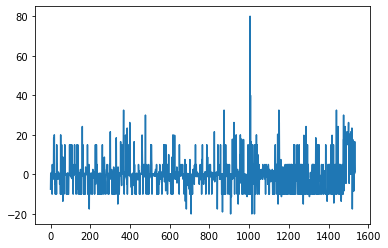

In [84]:
y = Time_Dom(x)
maxnorm = Max_Norm_LP(y,mu, k, 5)
maxqubo = maxnorm.compile().to_qubo()
plt.plot(maxqubo[0].values())

2026.4585036738256


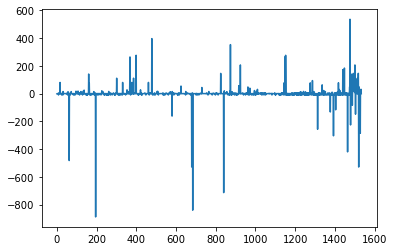

In [109]:
problem = Max_Norm_LP(y,mu, k, 1) - L2(x) + 10*EVM(x,x) 
problem_qubo = problem.compile().to_qubo()
print(problem_qubo[1])
plt.plot(problem_qubo[0].values())

In [64]:
import numpy as np
import pyqubo as pq
import sympy as sp
import pandas as pd
import seaborn as sns

# from PyQubo_formulation import *
from Utilities import *
# from Radio import *

import neal
import itertools

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors

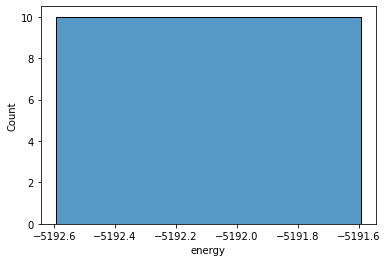

In [107]:
sampler = neal.SimulatedAnnealingSampler()

sampleset = sampler.sample_qubo(problem_qubo[0], num_reads=10)

samples = sampleset.samples()


data = sampleset.to_pandas_dataframe()

min_samples = Get_Low_E_Samples(data, 0)

sns.histplot(data['energy'])

plt.show()

In [108]:
data

,k[0],k[10],k[11],k[12],k[13],k[14],k[15],k[1],k[2],k[3],...,x[8] * x[9],x[9],x[9] * x[10],x[9] * x[11],x[9] * x[12],x[9] * x[13],x[9] * x[14],x[9] * x[15],energy,num_occurrences
0,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,-5192.093585,1
1,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,-5192.093585,1
2,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,-5192.093585,1
3,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,-5192.093585,1
4,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,-5192.093585,1
5,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,-5192.093585,1
6,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,-5192.093585,1
7,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,-5192.093585,1
8,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,-5192.093585,1
9,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,-5192.093585,1


In [100]:
min_samples[0][0]['k[0]']

1

In [103]:
    
nqx, nqk, nqmu = 4,4,4

mu_res = np.zeros(len(min_samples[0]))
k_res = np.zeros((len(min_samples[0]), 4))
x_res = np.zeros((len(min_samples[0]), 4))

for i in range(len(min_samples)):

    musamps = [min_samples[0][i][k] for k in muvars]
    mu_res[i] = Float_Approx(musamps, [0,4])

    ksamps = [min_samples[0][i][k] for k in kvars]
    xsamps = [min_samples[0][i][k] for k in xvars]
    for j in range(4):
            k_res[i][j] = Float_Approx(ksamps[j*nqk : nqk*(j+1)], [0,1])
            x_res[i][j] = Float_Approx(xsamps[j*nqx : nqx*(j+1)], [-1,1])

# mu_result.append(mu_res)
# k_result.append(k_res)


In [106]:
print(mu_res)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [5]:
Num_Bin_For_Accuracy(0.01, 1)


(6.0, 0.005625)

/Users/davidbern/Desktop/Desktop/Master/Master Thesis/programming/PyQubo_formulation.py:24: RuntimeWarning: divide by zero encountered in log2
  num_bin = -np.ceil(np.log2(decimal_accuracy / interval_size))


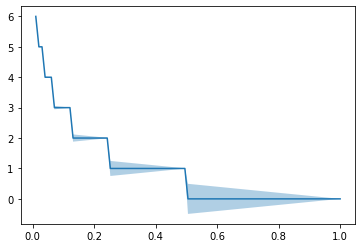

In [27]:
acc = np.linspace(0., 1, 100)

fig, ax = plt.subplots(1)
ax.plot(acc,Num_Bin_For_Accuracy(acc, 1)[0])
ax.fill_between(acc, Num_Bin_For_Accuracy(acc,1)[0] - Num_Bin_For_Accuracy(acc,1)[1], Num_Bin_For_Accuracy(acc,1)[0] + Num_Bin_For_Accuracy(acc,1)[1], alpha=0.35)
# ax.set_yscale('log')
# ax.set_xscale('log')